In [1]:
# -*- coding: utf-8 -*-
# !/usr/bin/python
# Cross Wavelet Analysis (CWA) based on Maraun and Kurths(2004).
# http://www.nonlin-processes-geophys.net/11/505/2004/npg-11-505-2004.pdf
# author: Mabel Calim Costa
# INPE
# 23/01/2013
# reviewed --- 02/03/2018
"""
Created on Mon Jun 17 2013

@author: Mabel Calim Costa
"""
import numpy as np
import pylab
from pylab import *
import matplotlib.pyplot as plt
import cmath
import pandas as pd

In [196]:
def cross_wavelet(wave1, wave2):
    """ Computes the cross wavelet analysis.
    wave1 = result['wave'] time serie 1
            wave2 = result['wave'] time serie 2
    A normalized time and scale resolved measure for the relationship
    between two time series x1(ti) and x2(ti) is the wavelet coherency (WCO),
    which is defined as the amplitude of the WCS(wavelet cross spectrum)
    normalized to the two single WPS(wavelet power spectrum) (Maraun and
    Kurths,2004).

    WCOi(s) = |WCSi(s) |/ (WPSi1(s) WPSi2(s)) ˆ1/2
    _____________________________________________________________________
    Inputs:
    wave1 - wavelet transform of time series x1
            wave2 - wavelet transform of time series x2
    Outputs:
    cohere - wavelet coherency (WCO)
    Call function:
    cohere = cross_wavelet(wave1,wave2)
    """

    cross_power = wave1 * wave2.conjugate()
    WPS12 = np.absolute(wave1 * wave2.conjugate())
    WPS1 = np.absolute(wave1 * wave1.conjugate())
    WPS2 = np.absolute(wave2 * wave2.conjugate())
    #coherence = np.sqrt(cross_power*cross_power)/ \
    #np.sqrt(np.absolute(wave1.real*wave1.imag)* np.absolute(wave2.real*wave2.imag))
    #coherence = ((WPS12)*(WPS12)) / ((WPS1 * WPS2))
    coherence = (WPS12)/ (np.sqrt(WPS1 * WPS2))
    phase_angle = np.angle(cross_power)  # ,deg=True)
    return WPS12, coherence, phase_angle



In [85]:
 def plot_cross(var, cross_power, phase_angle, time, result, result1):
    """ PLOT CROSS POWER
    cross_power = from cross_wavelet function
    coherence   = from cross_wavelet function
    """
    import matplotlib.gridspec as gridspec
    fig = plt.figure(figsize=(15, 10), dpi=300)
    # set plot grid
    gs1 = gridspec.GridSpec(4, 3)
    gs1.update(left=0.05)
    ax1 = plt.subplot(gs1[0, :])
    ax1 = pylab.gca()
    ax1.xaxis.set_visible(False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax2 = plt.subplot(gs1[1:4, :])# axisbg='#C0C0C0')
    # plot timeseries
    ax1.plot(time, result['data'])
    ax1.set_ylabel('Amplitude', fontsize=13)
    ax1.axis('tight')
    ax3 = ax1.twinx()
    ax3.plot(time, result1['data'], color='c')
    ax3.set_ylabel(result1['name'])
    ax3.axis('tight')
    ax1.set_title('%s' % var, fontsize=15)
    ax1.yaxis.set_major_locator(MaxNLocator(prune='lower'))
    ax1.grid(True)
    ax1.xaxis.set_visible(False)

    phs_dt = round(len(time) / 20)
    tidx = np.arange(np.max(np.floor(phs_dt / 2)), len(time), phs_dt)
    tidx = [int(i) for i in tidx]
    tidx = np.array(tidx)
    phs_dp = round(len(result['period']) / 20)
    pidx = np.arange(
        np.max(np.floor(phs_dp / 2)), len(result['period']), phs_dp)
    pidx = [int(i) for i in pidx]
    pidx = np.array(pidx)
    X, Y = meshgrid(
        time.astype(np.int64)[tidx], np.log2(result['period'][pidx]))
    
    #Arrows indicate in phase when pointing to the right and out of phase when pointing left.
    phase_angle1 = phase_angle[:, tidx]
    phase_angle1 = phase_angle1[pidx, :]
    cA = np.exp(1j * phase_angle1)
    U = np.real(cA)
    V = np.imag(cA)
    ax4 = ax2.twiny()
    ax4.xaxis.set_visible(False)
    # ax4.set_xlim(0.9,4.4)
    CS = ax2.contourf(time, np.log2(result['period']), cross_power)
    # cone-of-influence , anything "below"is dubious
    ax2.plot(time, np.log2(result['coi']), 'k')
    ax2.fill_between(time, np.log2(result['coi']), int(
        np.log2(result['period'][-1]) + 1), alpha=0.5, hatch='/')
    position = fig.add_axes([0.15, 0.05, 0.6, 0.01])
    # ,norm=normal)#,shrink=0.5,pad=0.08)
    cbar = plt.colorbar(CS, cax=position, orientation='horizontal')
    cbar.set_label('Power')
    Q = ax4.quiver(X.astype(np.int64), Y, U, V, linewidth=0.1)
    ax4.axis('tight')
    yt = range(int(np.log2(result['period'][0])), int(
        np.log2(result['period'][-1]) + 1))  # create the vector of periods
    Yticks = [float(math.pow(2, p)) for p in yt]  # make 2^periods
    Yticks = [int(i) for i in Yticks]
    ax2.set_yticks(yt)
    ax2.set_yticklabels(Yticks)
    ax2.set_ylim(ymin=(np.log2(result['period'][0])), ymax=(
        np.log2(result['period'][-1])))
    ax2.invert_yaxis()
    ax2.set_xlabel('Time', fontsize=13)
    ax2.set_ylabel('Period', fontsize=13)
    ax2.axhline(y=10.5, xmin=0, xmax=1, linewidth=2, color='k')
    ax2.axhline(y=13.3, xmin=0, xmax=1, linewidth=2, color='k')
    ax2.set_title('Cross Power')

    plt.savefig('Cross Power {0} vs {1}'.format(
        result['name'], result1['name']), dpi=300)




In [222]:
def plot_cohere(var, coherence, time, result, result1):
    """
    PLOT COHERENCE
    coherence   =  from cross_wavelet function
    time       =  time vector from load function
    result      =  dict from cwt function
    """
    import matplotlib.gridspec as gridspec
    from copy import copy
    import matplotlib.colors as colors
    fig = plt.figure(figsize=(15, 14), dpi=300)
    # set plot grid
    gs1 = gridspec.GridSpec(4, 3)
    gs1.update(left=0.05)
    ax1 = plt.subplot(gs1[0, :])
    ax1 = pylab.gca()
    ax1.xaxis.set_visible(False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax2 = plt.subplot(gs1[1:4, :])#, axisbg='#C0C0C0')

    # plot timeseries
    ax1.plot(time, result['data'])
    ax1.set_ylabel('Amplitude', fontsize=13)
    ax3 = ax1.twinx()
    ax3.plot(time, result1['data'], color='red')
    ax3.set_ylabel(result1['name'])
    ax1.set_title('%s' % var, fontsize=15)
    ax1.yaxis.set_major_locator(MaxNLocator(prune='lower'))
    ax1.grid(True)
    ax1.xaxis.set_visible(False)
    ax3.axis('tight')
    ax1.axis('tight')
    # fig = plt.figure(figsize=(15,10), dpi=100)
    lev = list(np.linspace(0, 1.0, 21))
    #palette = copy(plt.cm.inferno)
    #palette.set_over('r', 1.0)
    #palette.set_under('k', 1.0)
    #palette.set_bad('b', 1.0)
    CS = ax2.contourf(time, np.log2(result['period']), coherence,lev)
    ax2.plot(time, np.log2(result['coi']), 'k')
    ax2.fill_between(time, np.log2(result['coi']), int(
        np.log2(result['period'][-1]) * 2), alpha=0.5, hatch='/')
    position = fig.add_axes([0.15, 0.05, 0.6, 0.01])

    cbar = plt.colorbar(CS, cax=position, orientation='horizontal')
    cbar.set_label('coherence')
    yt = range(int(np.log2(result['period'][0])), int(
        np.log2(result['period'][-1]) + 1))  # create the vector of periods
    Yticks = [float(math.pow(2, p)) for p in yt]  # make 2^periods
    Yticks = [int(i) for i in Yticks]
    ax2.set_yticks(yt)
    ax2.set_yticklabels(Yticks)
    ax2.set_ylim(ymin=(np.log2(result['period'][0])), ymax=(
        np.log2(result['period'][-1])))
    ax2.invert_yaxis()
    ax2.set_xlabel('Time', fontsize=15)
    ax2.set_ylabel('Period', fontsize=15)
    # ax2.axhline(y=10.5, xmin=0, xmax=1, linewidth=2, color='k')
    # ax2.axhline(y=13.3, xmin=0, xmax=1, linewidth=2, color='k')
    ax2.set_title('Coherence')
    #ax2.axis('tight')
    plt.savefig('Coherence {0} vs {1}'.format(
        result['name'], result1['name']), dpi=300)
    return
    # cbar = plt.colorbar(CS)
    # ax = gca() # handle to the current axes
    # ax.set_ylim(ax.get_ylim()[::-1])  # reverse plot along y axis
    # yt =  range(int(np.log2(result['period'][0])),
    #  int(np.log2(result['period'][-1]))+1) # create the vector of periods
    # xt = range(int(time[0]),int(time[-1]))
    # Yticks = [(math.pow(2,p)) for p in yt]  # make 2^periods
    # yticks(yt, map(str,Yticks))
    # xticks(xt, map(str,xt),rotation=45)
    # xlim(time[0],time[-1])  # date on the x axis
    # xlabel('Time')
    # ylabel('Period')
    # title('Coherence')


1024 1024


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


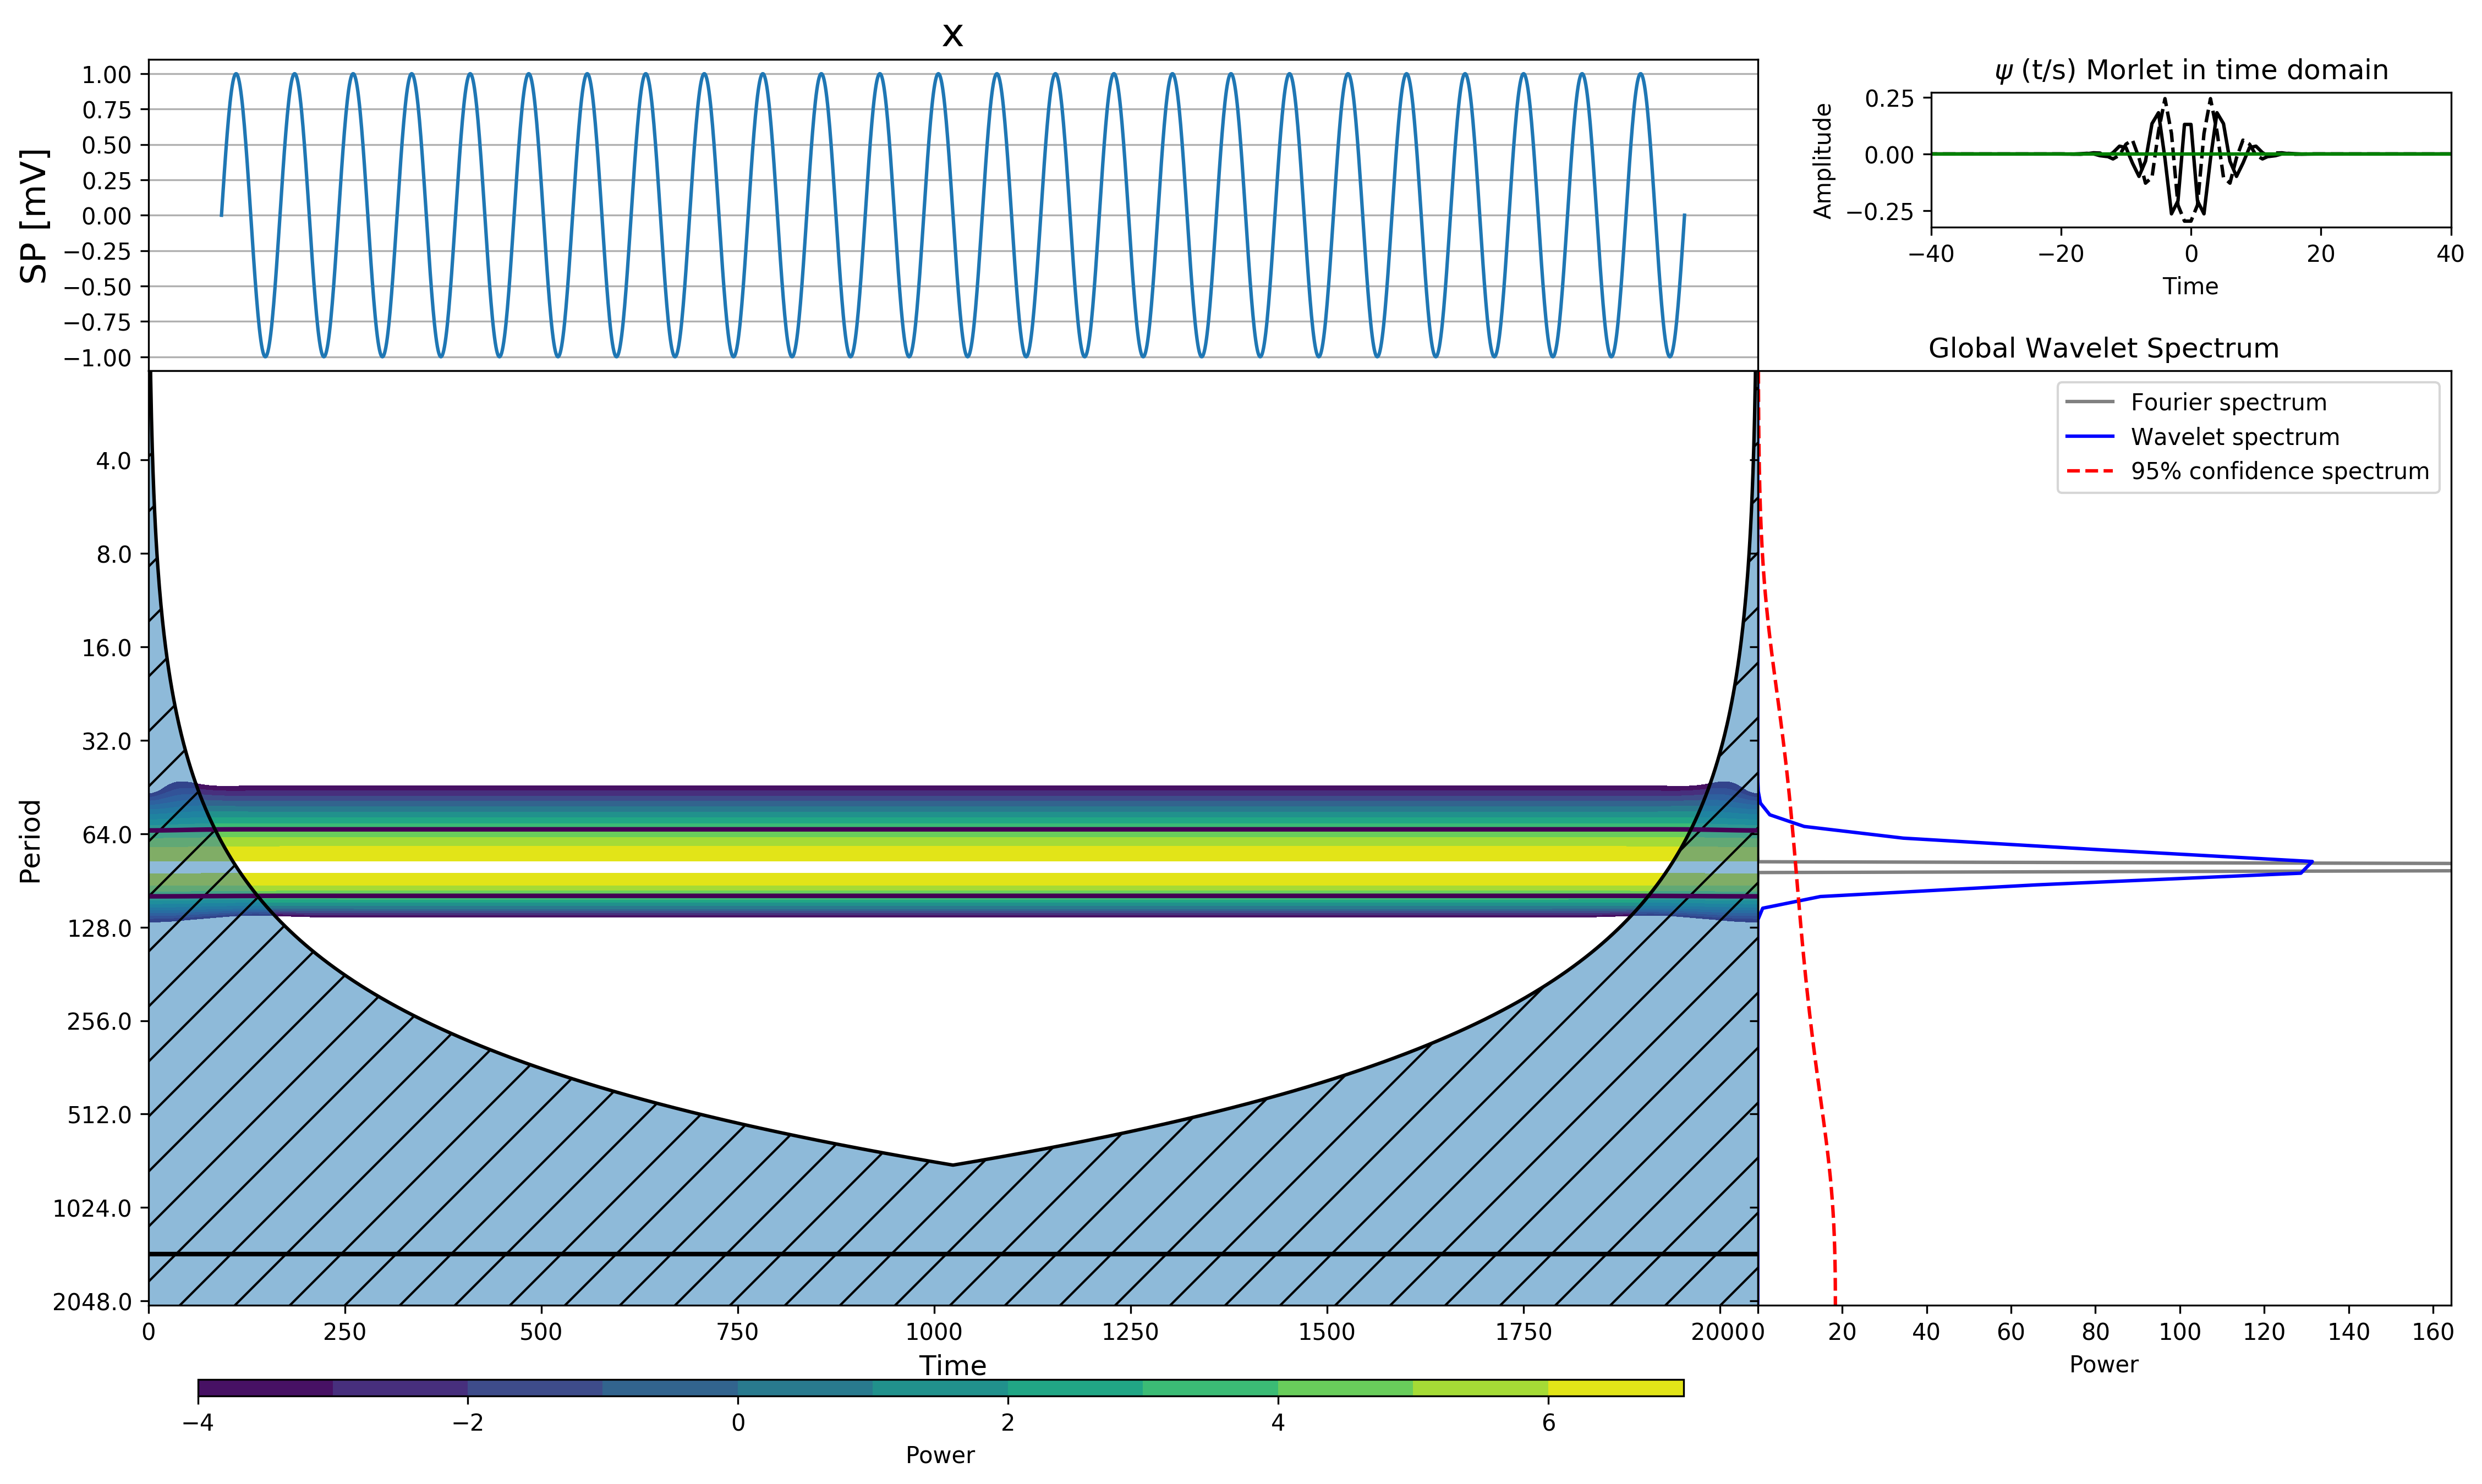

In [235]:
# using the example : example_python3.6.ipynb
import numpy as np
from pylab import *
import waipy
z = np.linspace(0,2048,2048)
x = np.sin(50*np.pi*z)

data_norm_x = waipy.normalize(x)
result_x = waipy.cwt(data_norm_x, 1, 1, 0.125, 2, 4/0.125, 0.72, 6,mother='Morlet',name='x')
waipy.wavelet_plot('x', z, x, 0.03125, result_x)

1024 1024


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


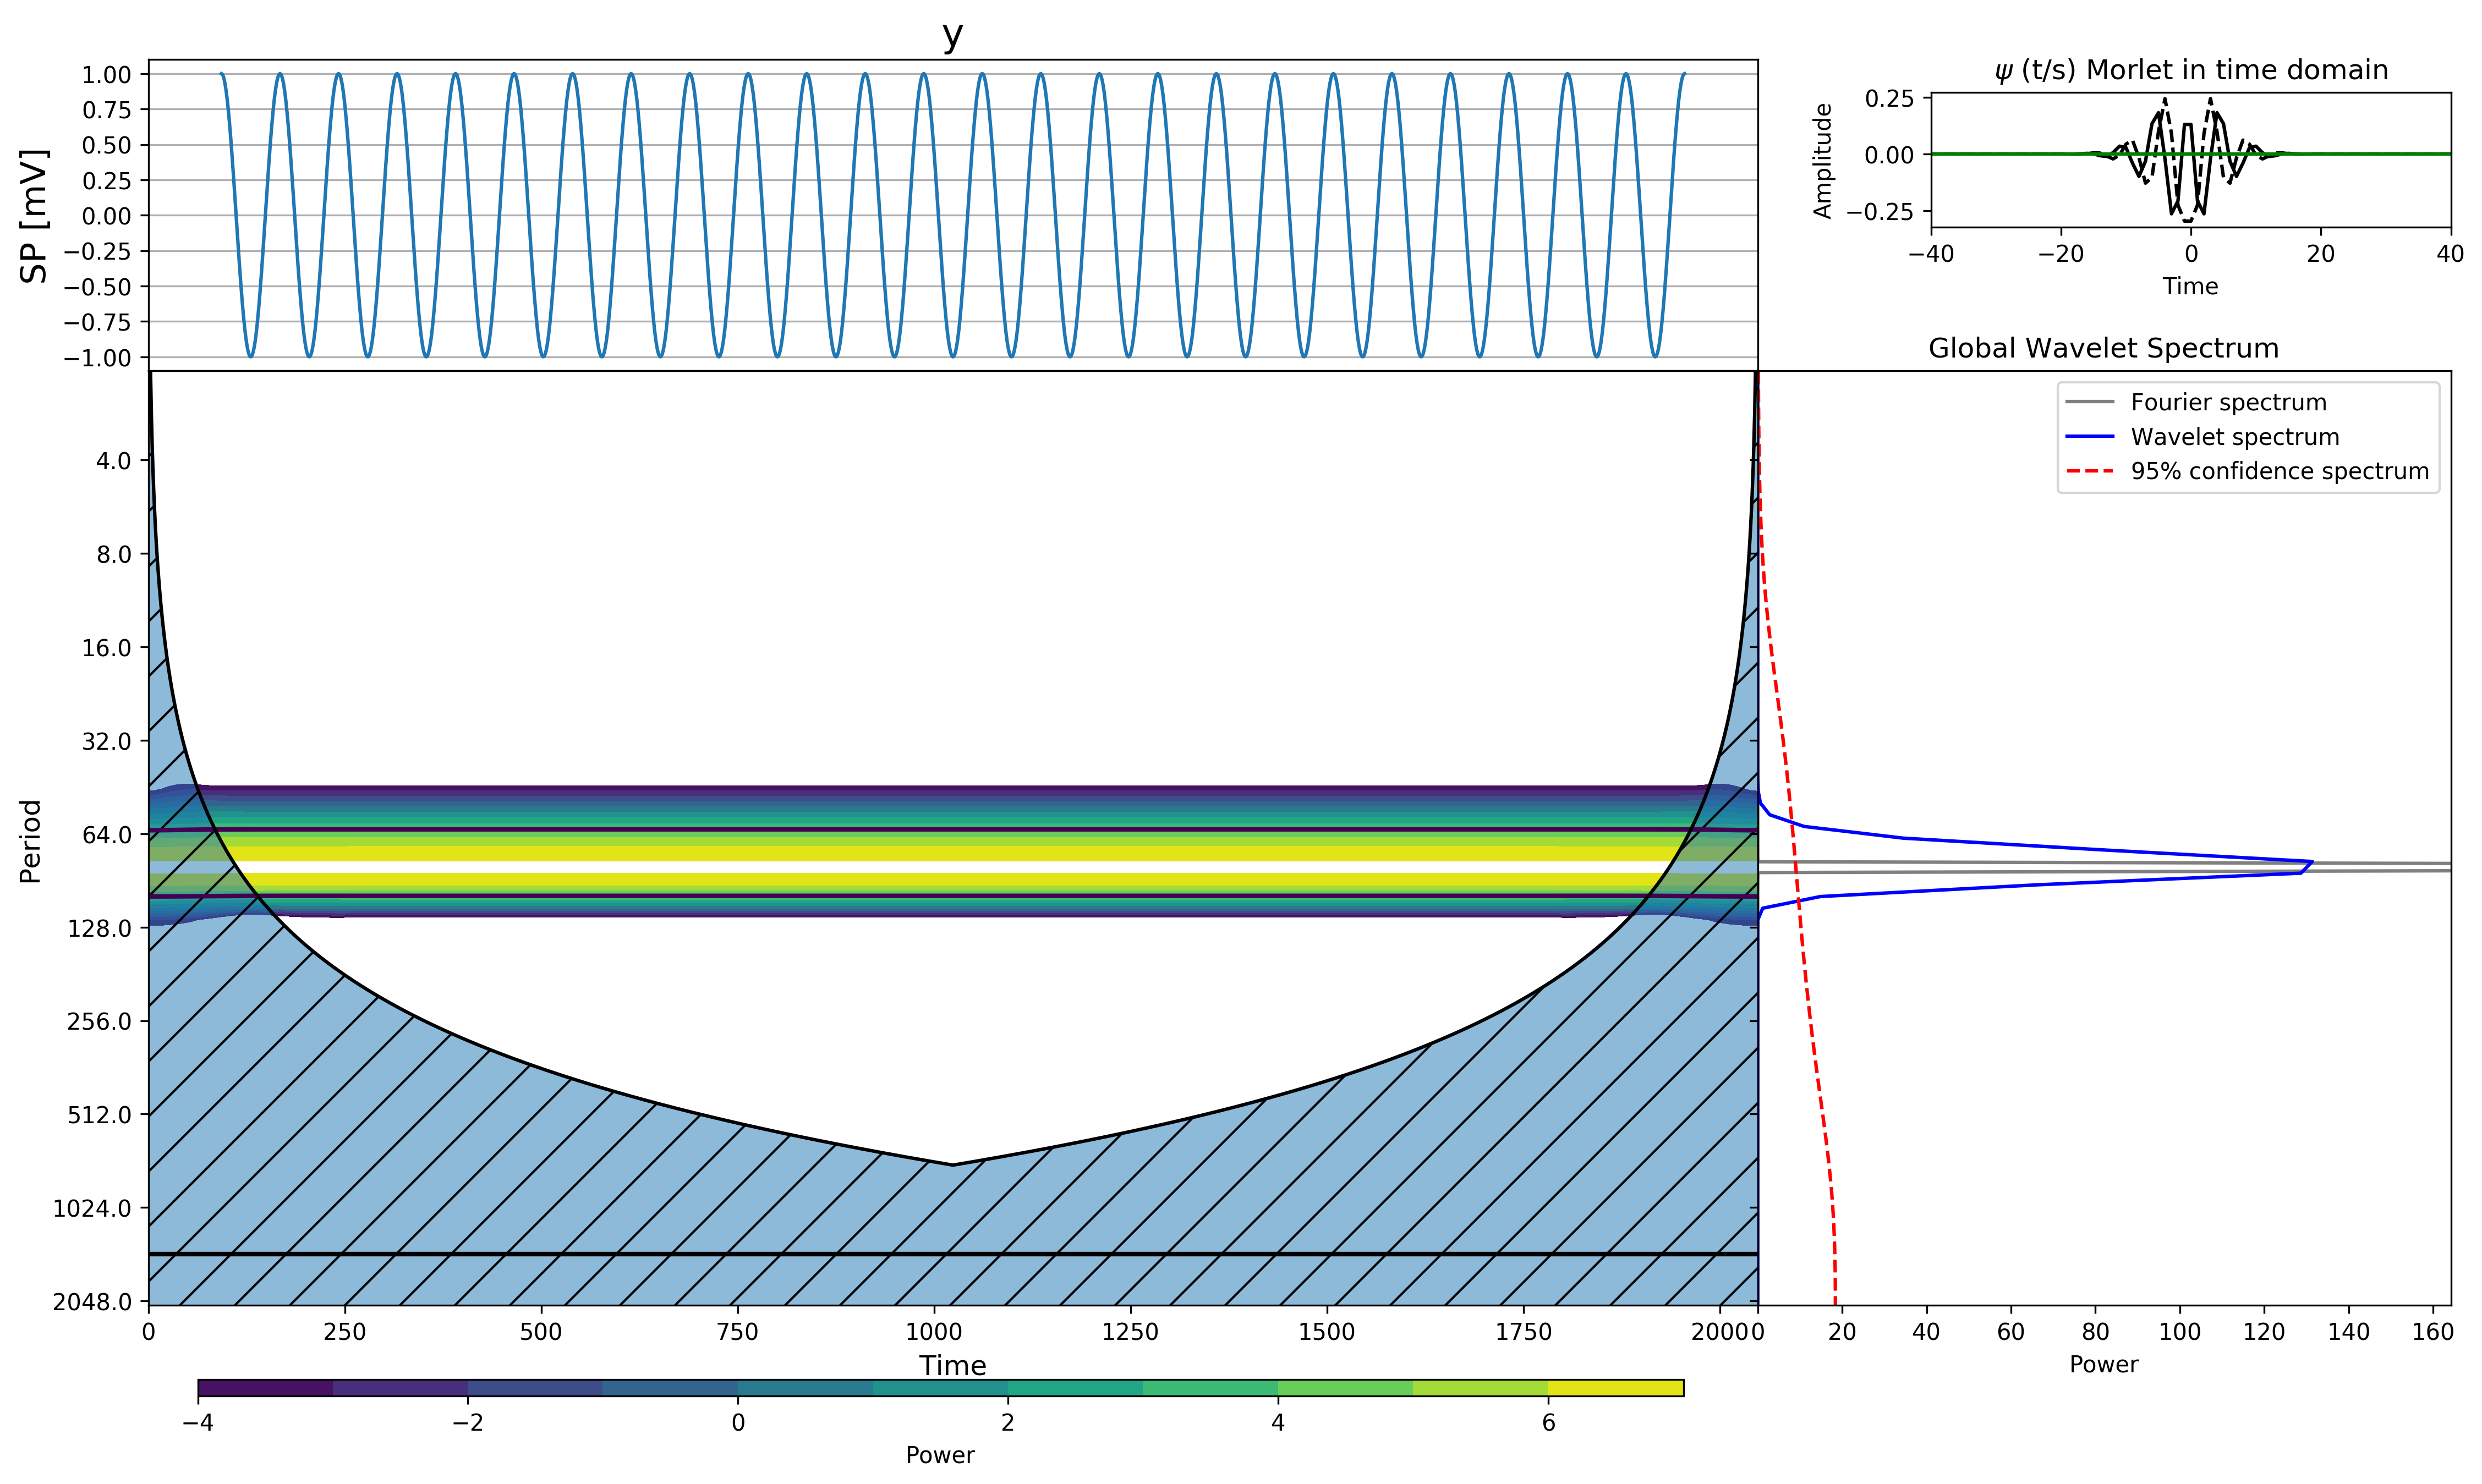

In [239]:
#let's create another artificial signal to compare with that!
y = np.cos(50*np.pi*z)  # signal out of phase from x
#noise = np.sin(7*np.pi*z)+np.cos(2*np.pi*z)
#y = np.sin(30*np.pi*z)+noise #out of phase signal compared to x + noise
data_norm_y = waipy.normalize(y)
result_y = waipy.cwt(data_norm_y, 1, 1, 0.125, 2, 4/0.125, 0.72, 6,mother='Morlet',name='x')
waipy.wavelet_plot('y', z, y, 0.03125, result_y)


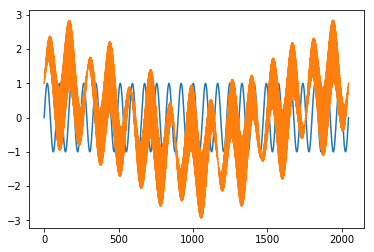

In [234]:

plot(np.sin(50*np.pi*z))
plot(np.sin(30*np.pi*z)+np.sin(7*np.pi*z)+np.cos(2*np.pi*z))
#plot(2*np.sin(50*np.pi*z))


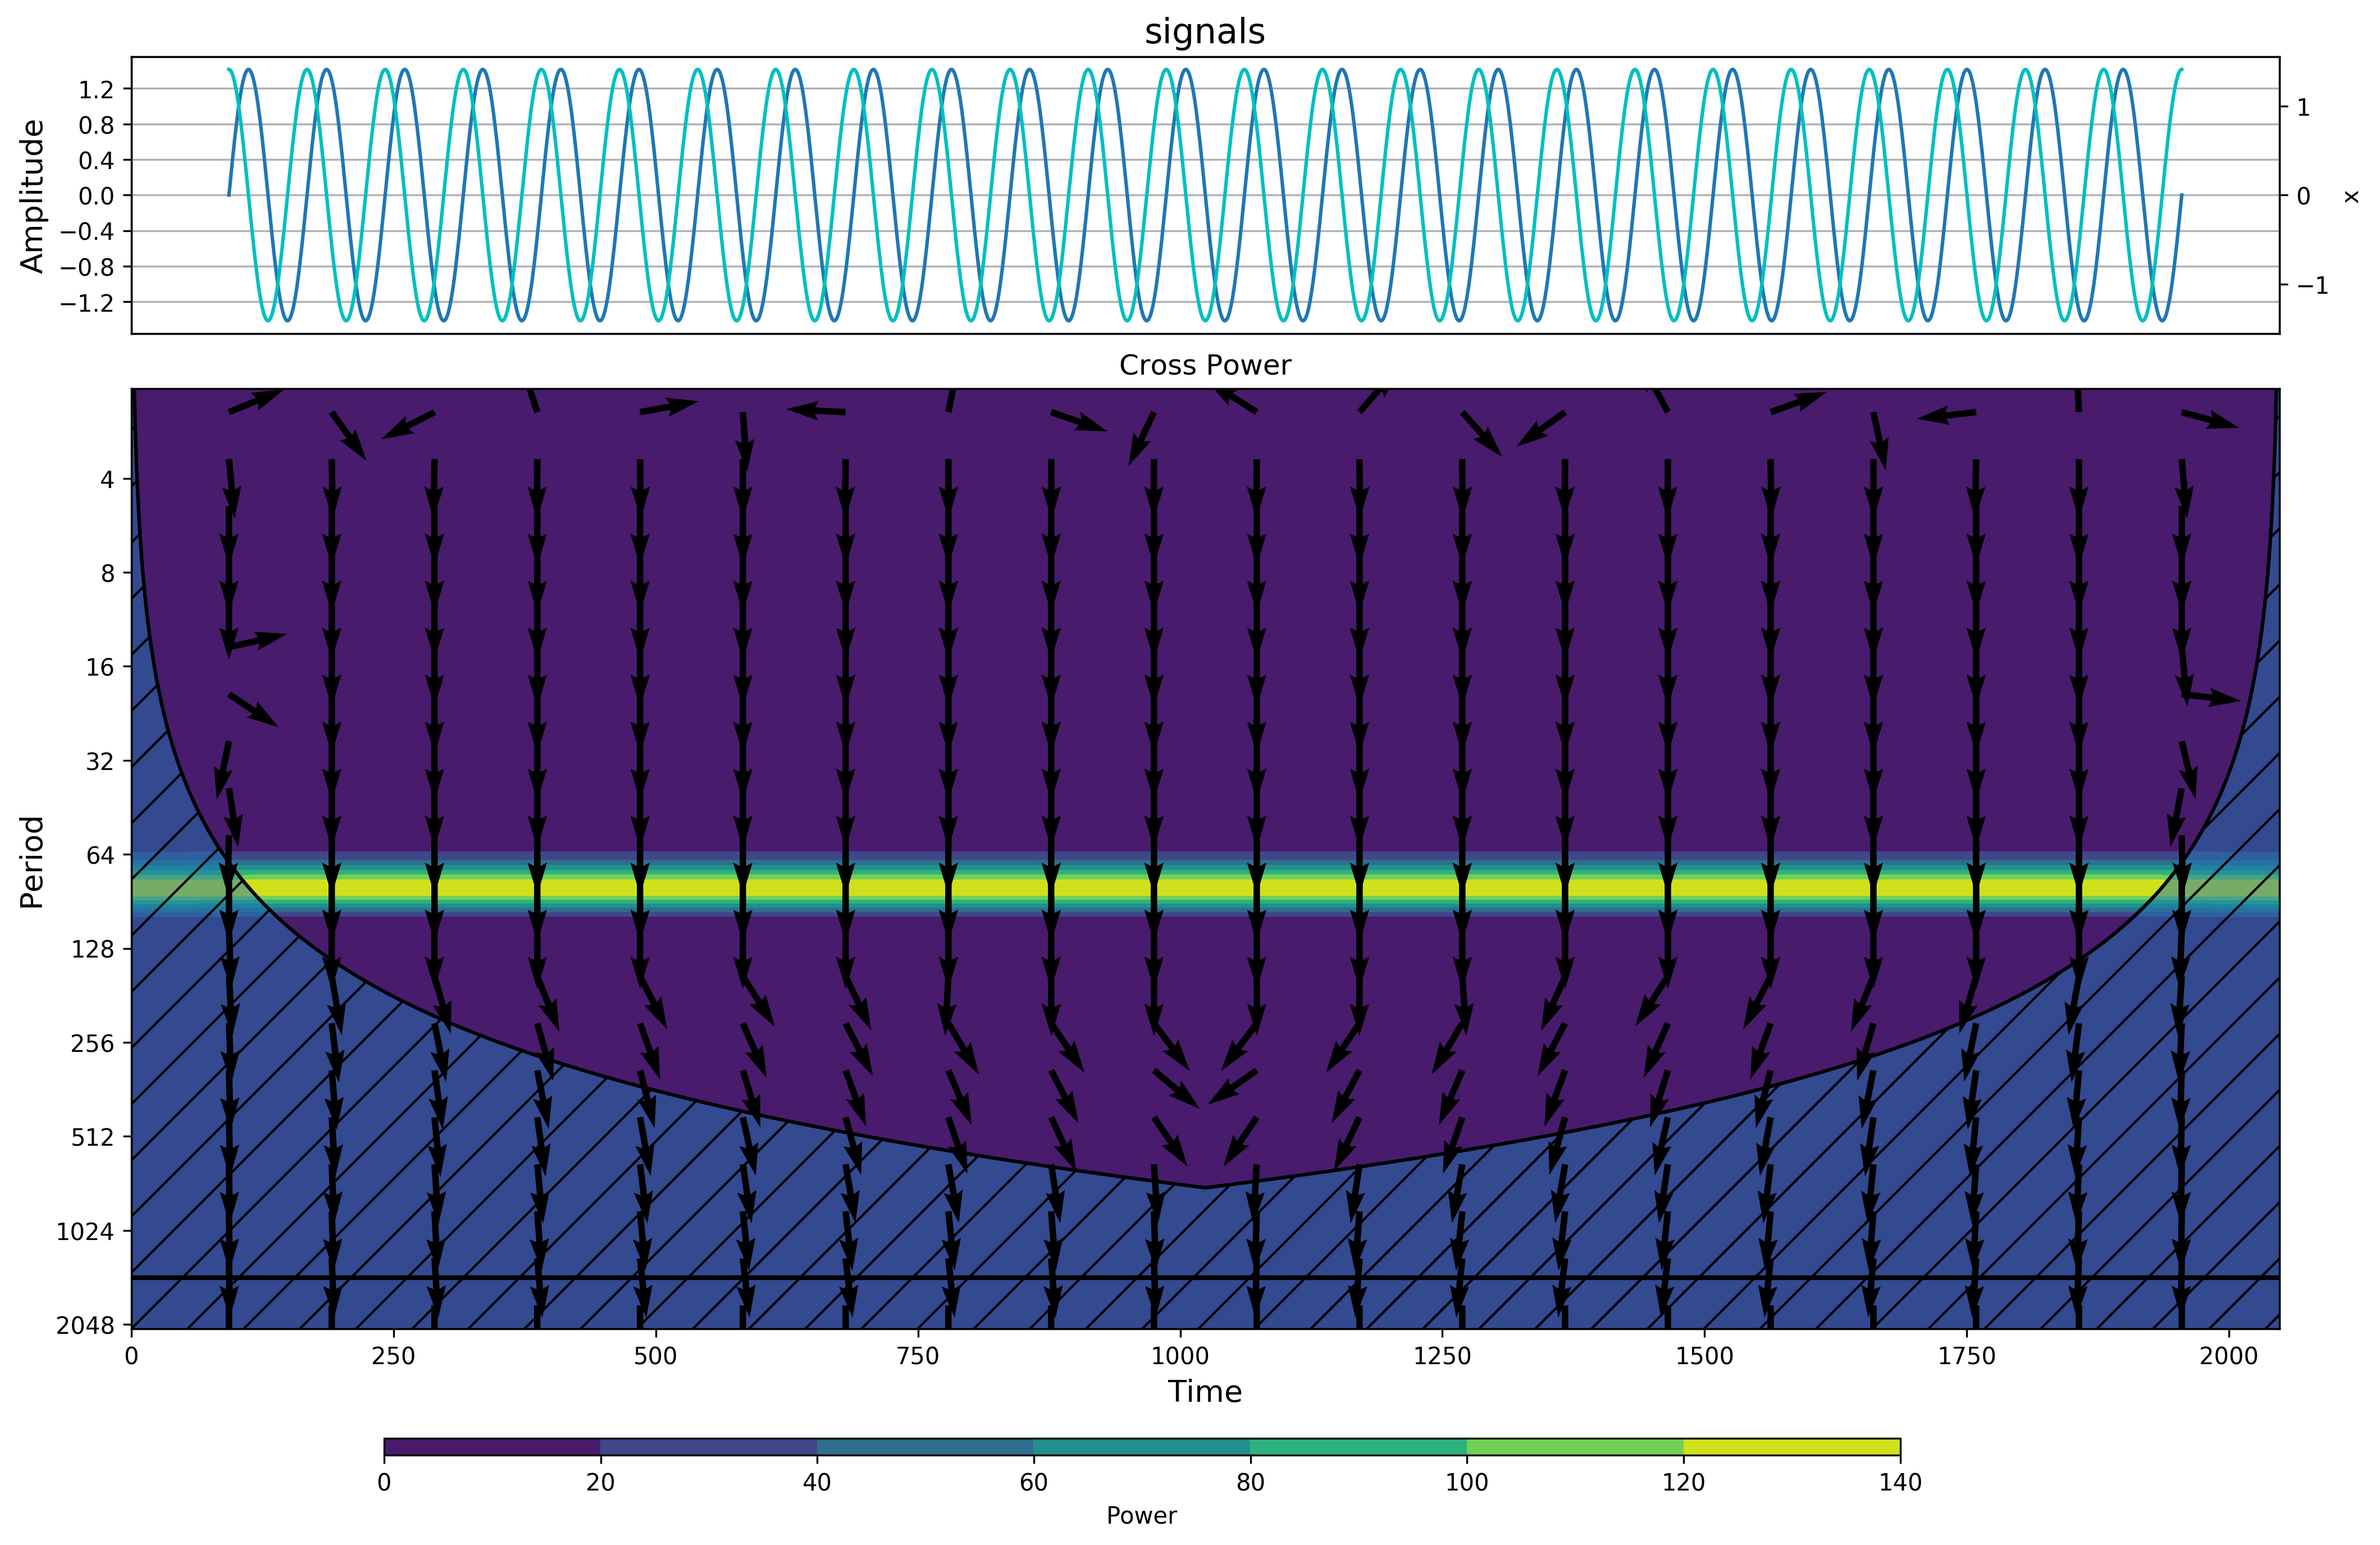

In [240]:
cross_power, coherence, phase_angle = cross_wavelet(result_x['wave'],result_y['wave'])
plot_cross('signals', cross_power, phase_angle, z, result_x, result_y)
#Arrows indicate in phase when pointing to the right and out of phase when pointing left.

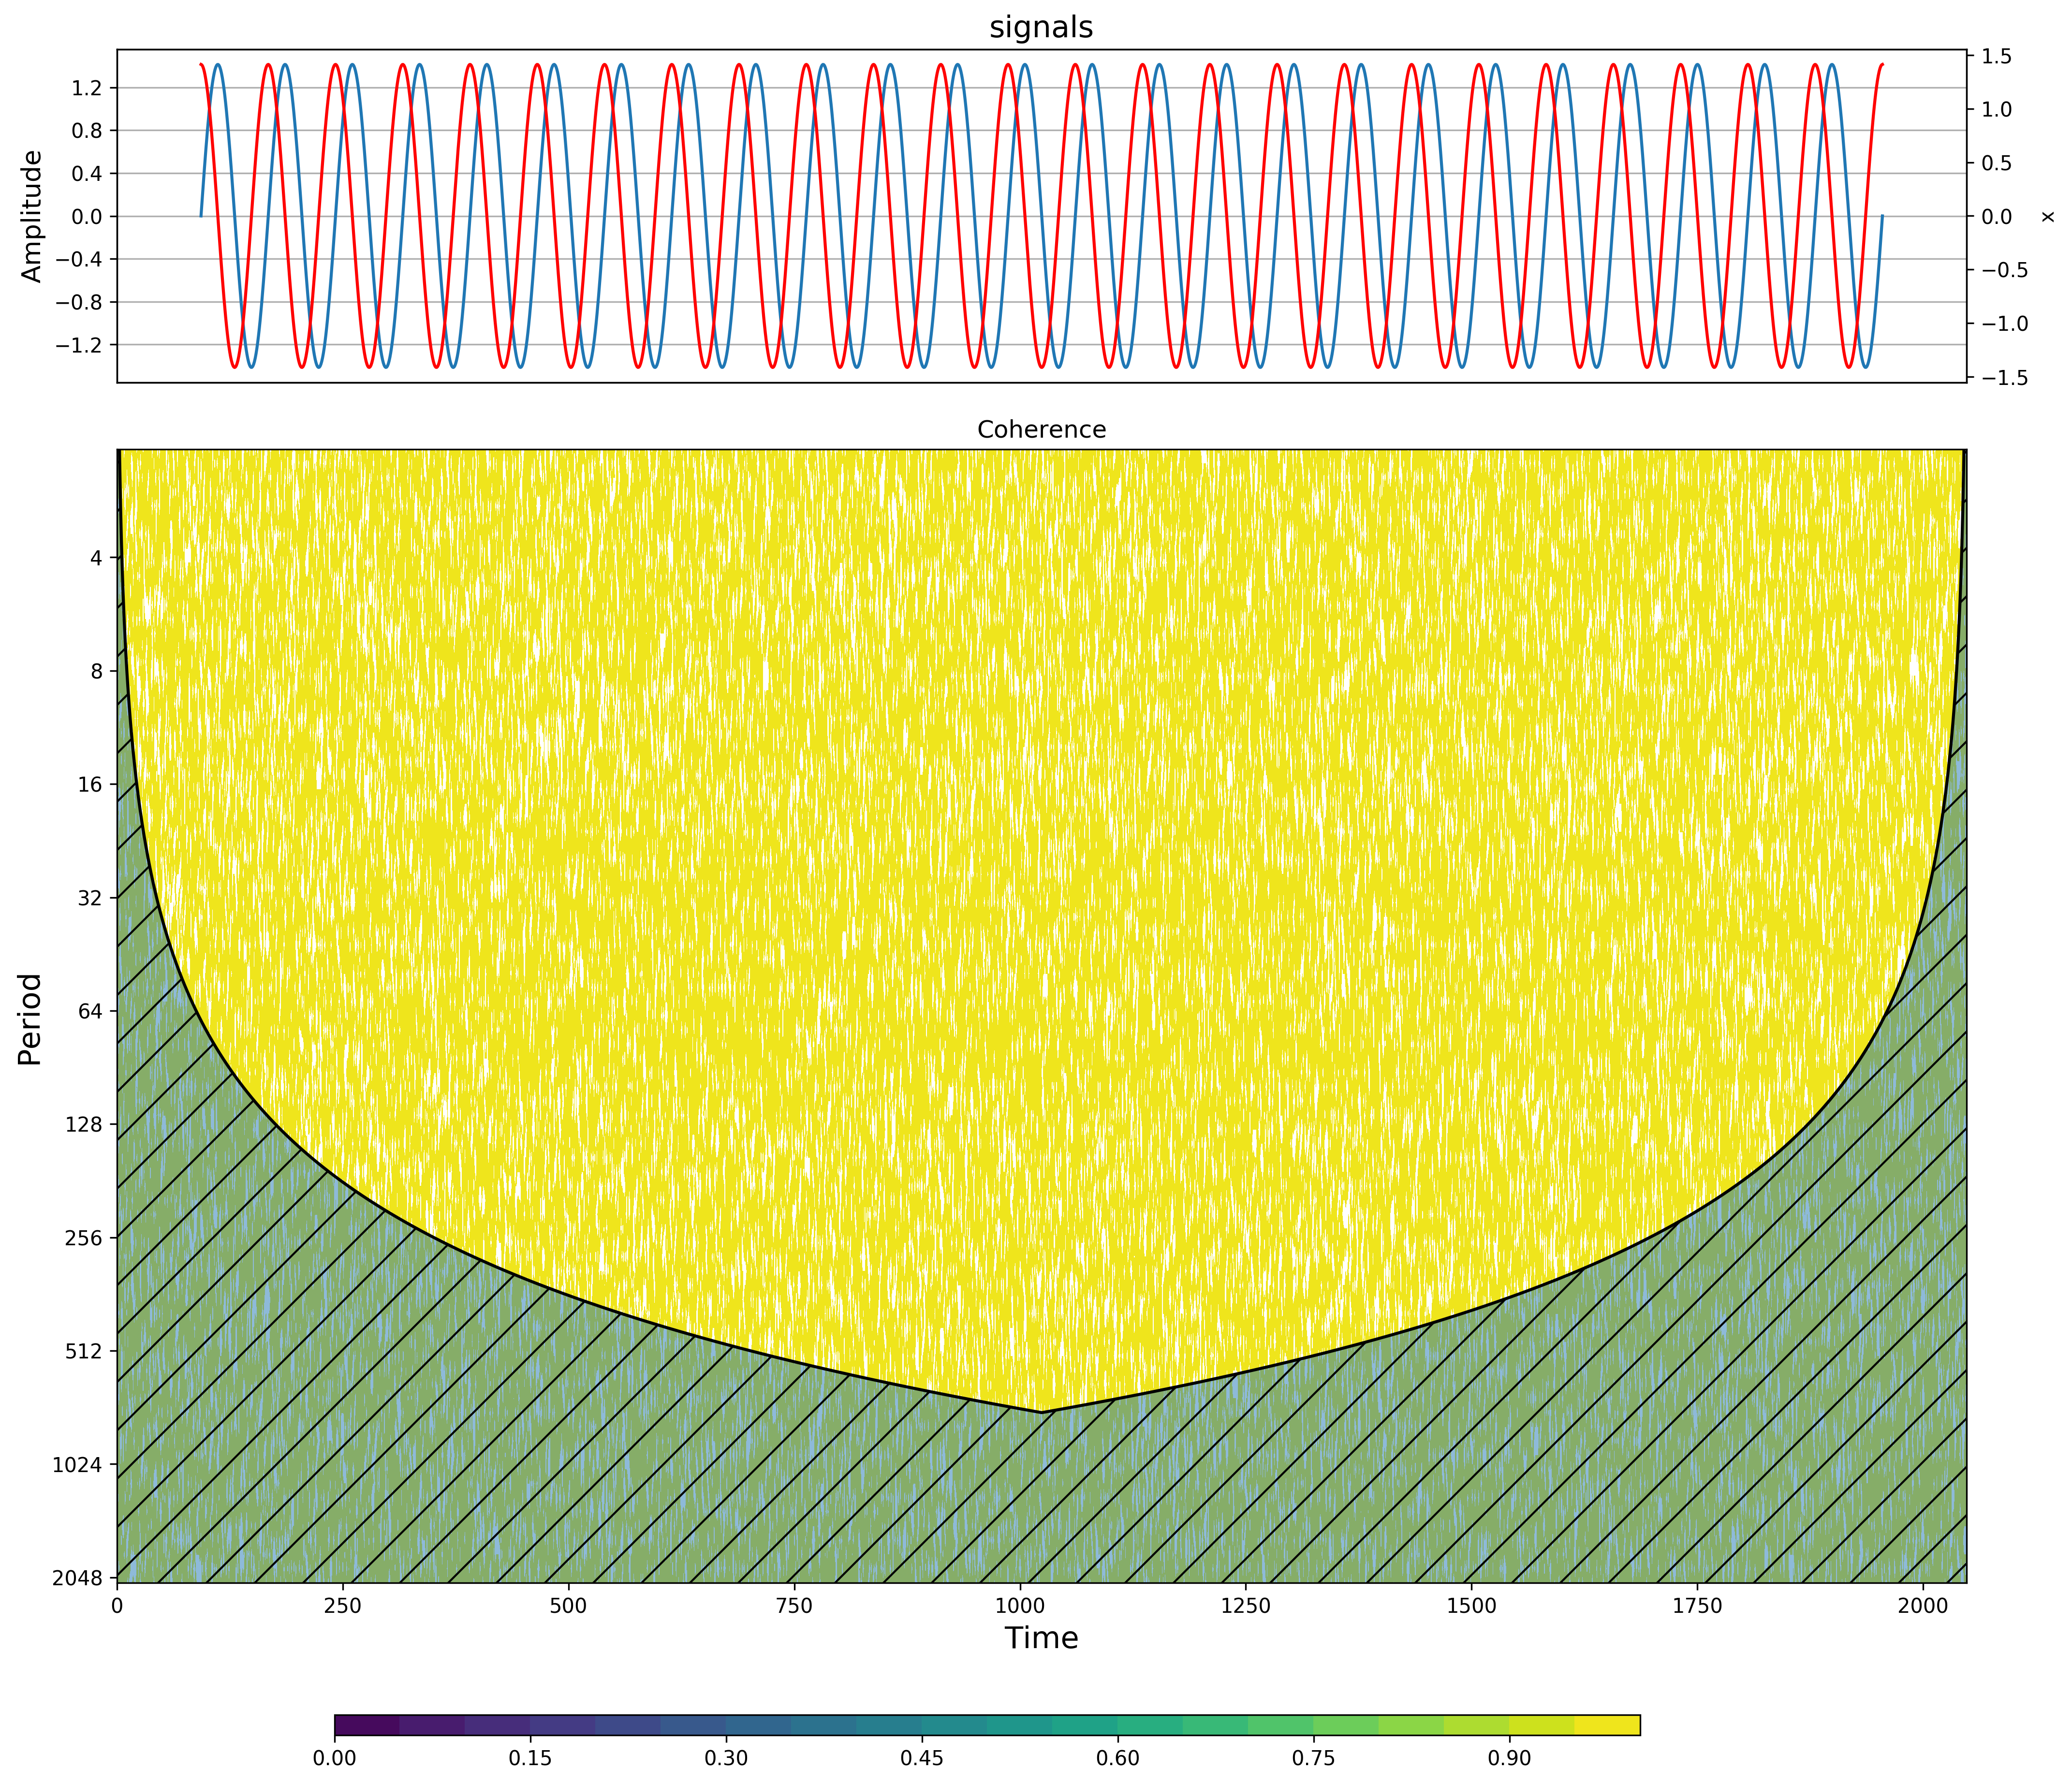

In [241]:
cross_power, coherence, phase_angle = cross_wavelet(result_x['wave'],result_y['wave'])
plot_cohere('signals',coherence,z,result_x, result_y)

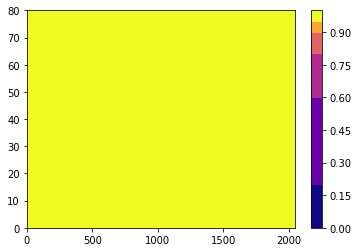

In [229]:

from copy import copy
import matplotlib.colors as colors
palette = copy(plt.cm.plasma)
palette.set_over('r', 0.95)
palette.set_under('k', 0.05)
lev=np.linspace(0,1.,21)
im=contourf(np.abs(coherence),lev, cmap=palette,norm=colors.BoundaryNorm([0,0.2,0.6,0.8,0.9,0.95, 1],
                                         ncolors=palette.N))
colorbar(im)

In [216]:
np.linspace(0,1,15)

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

64 64
64 64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


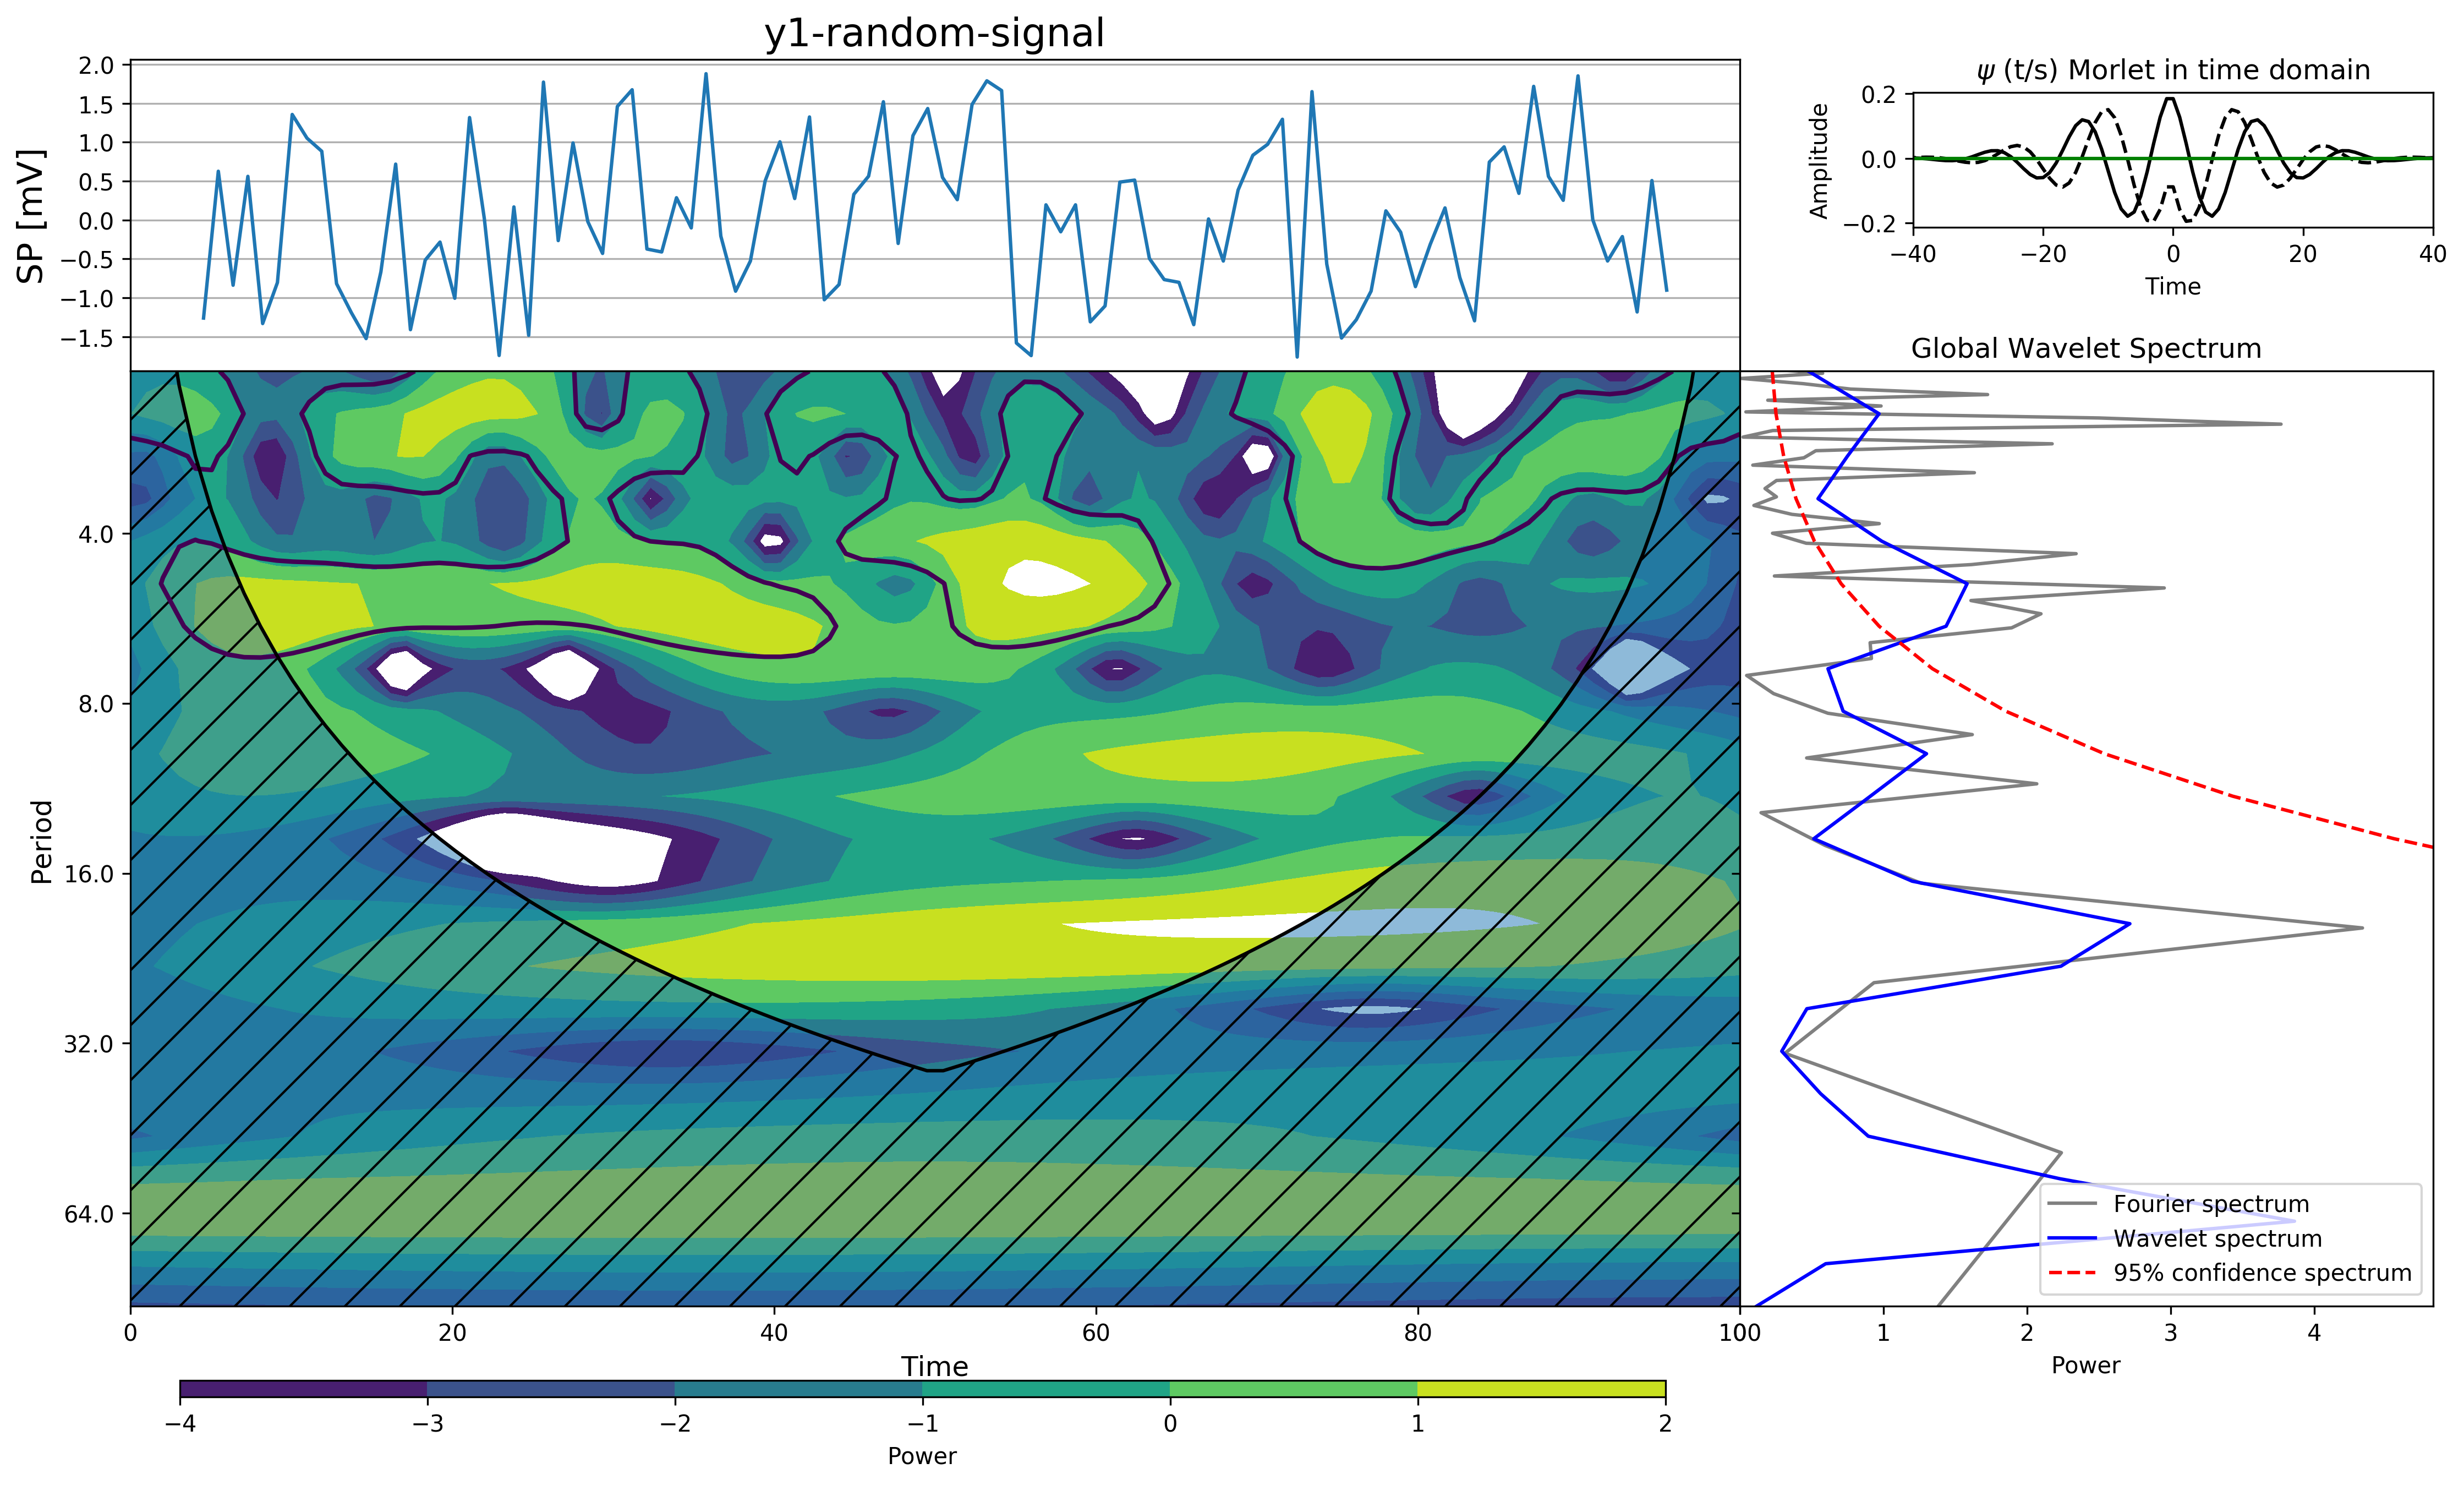

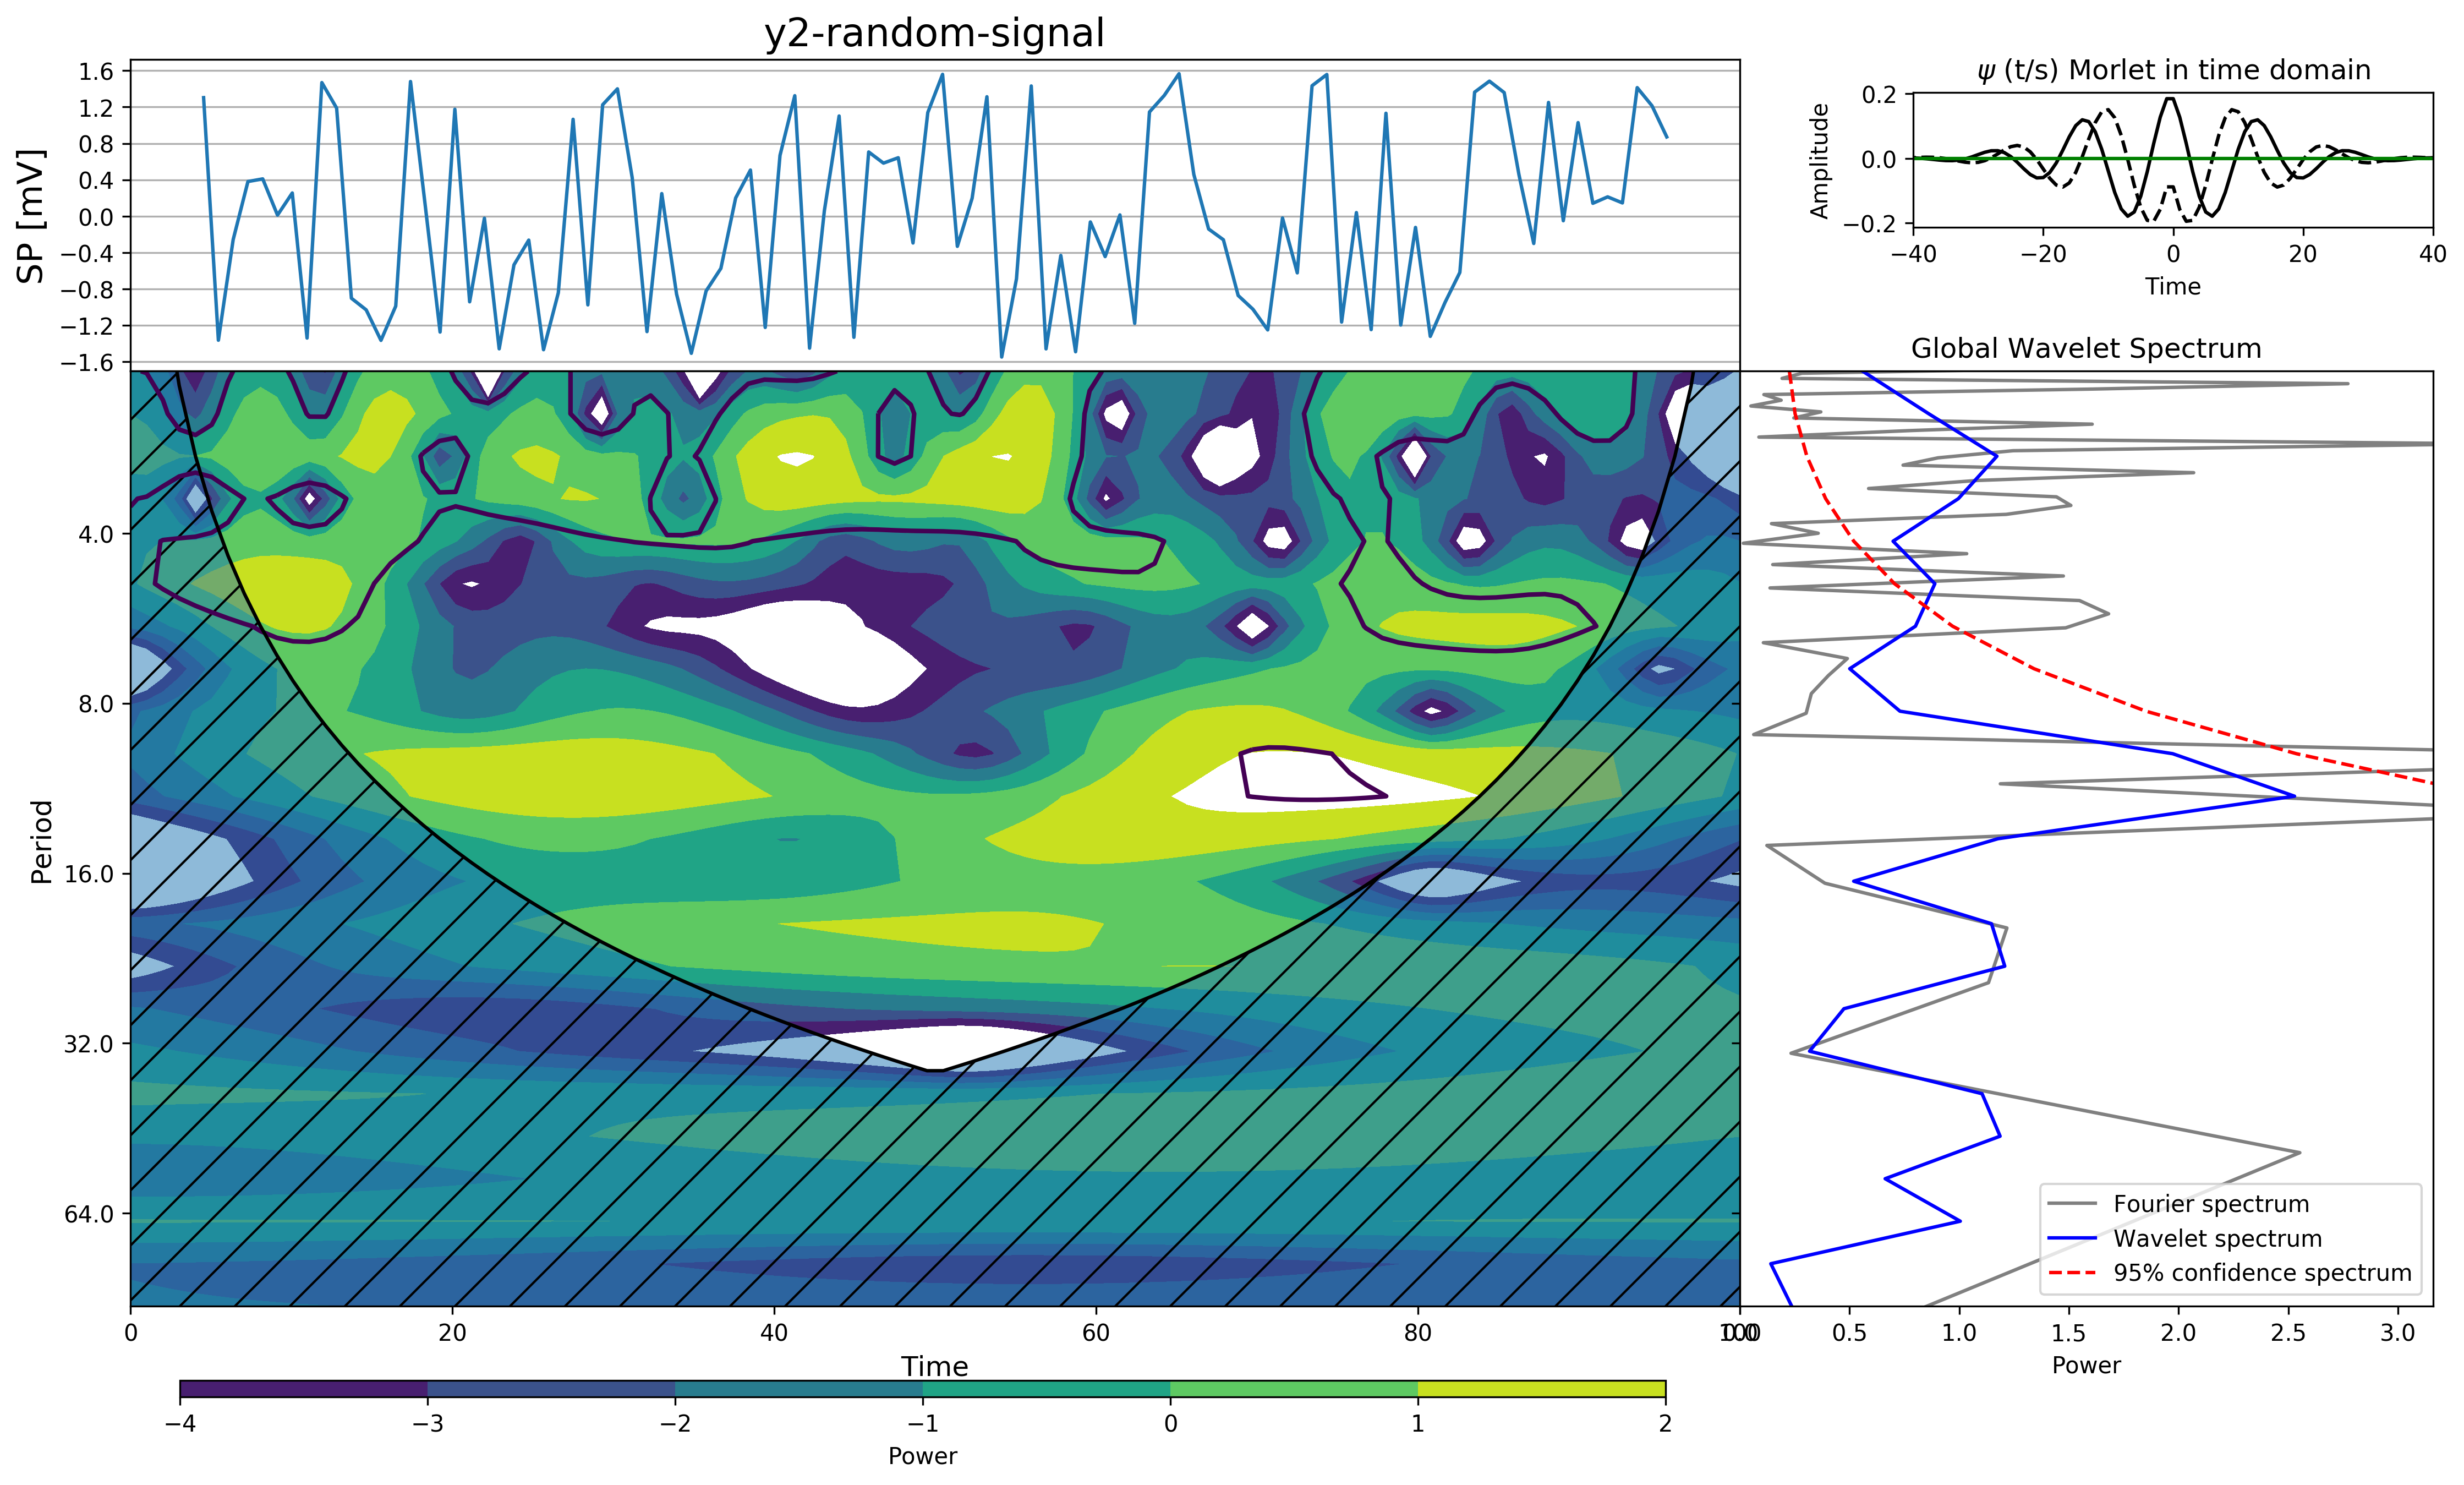

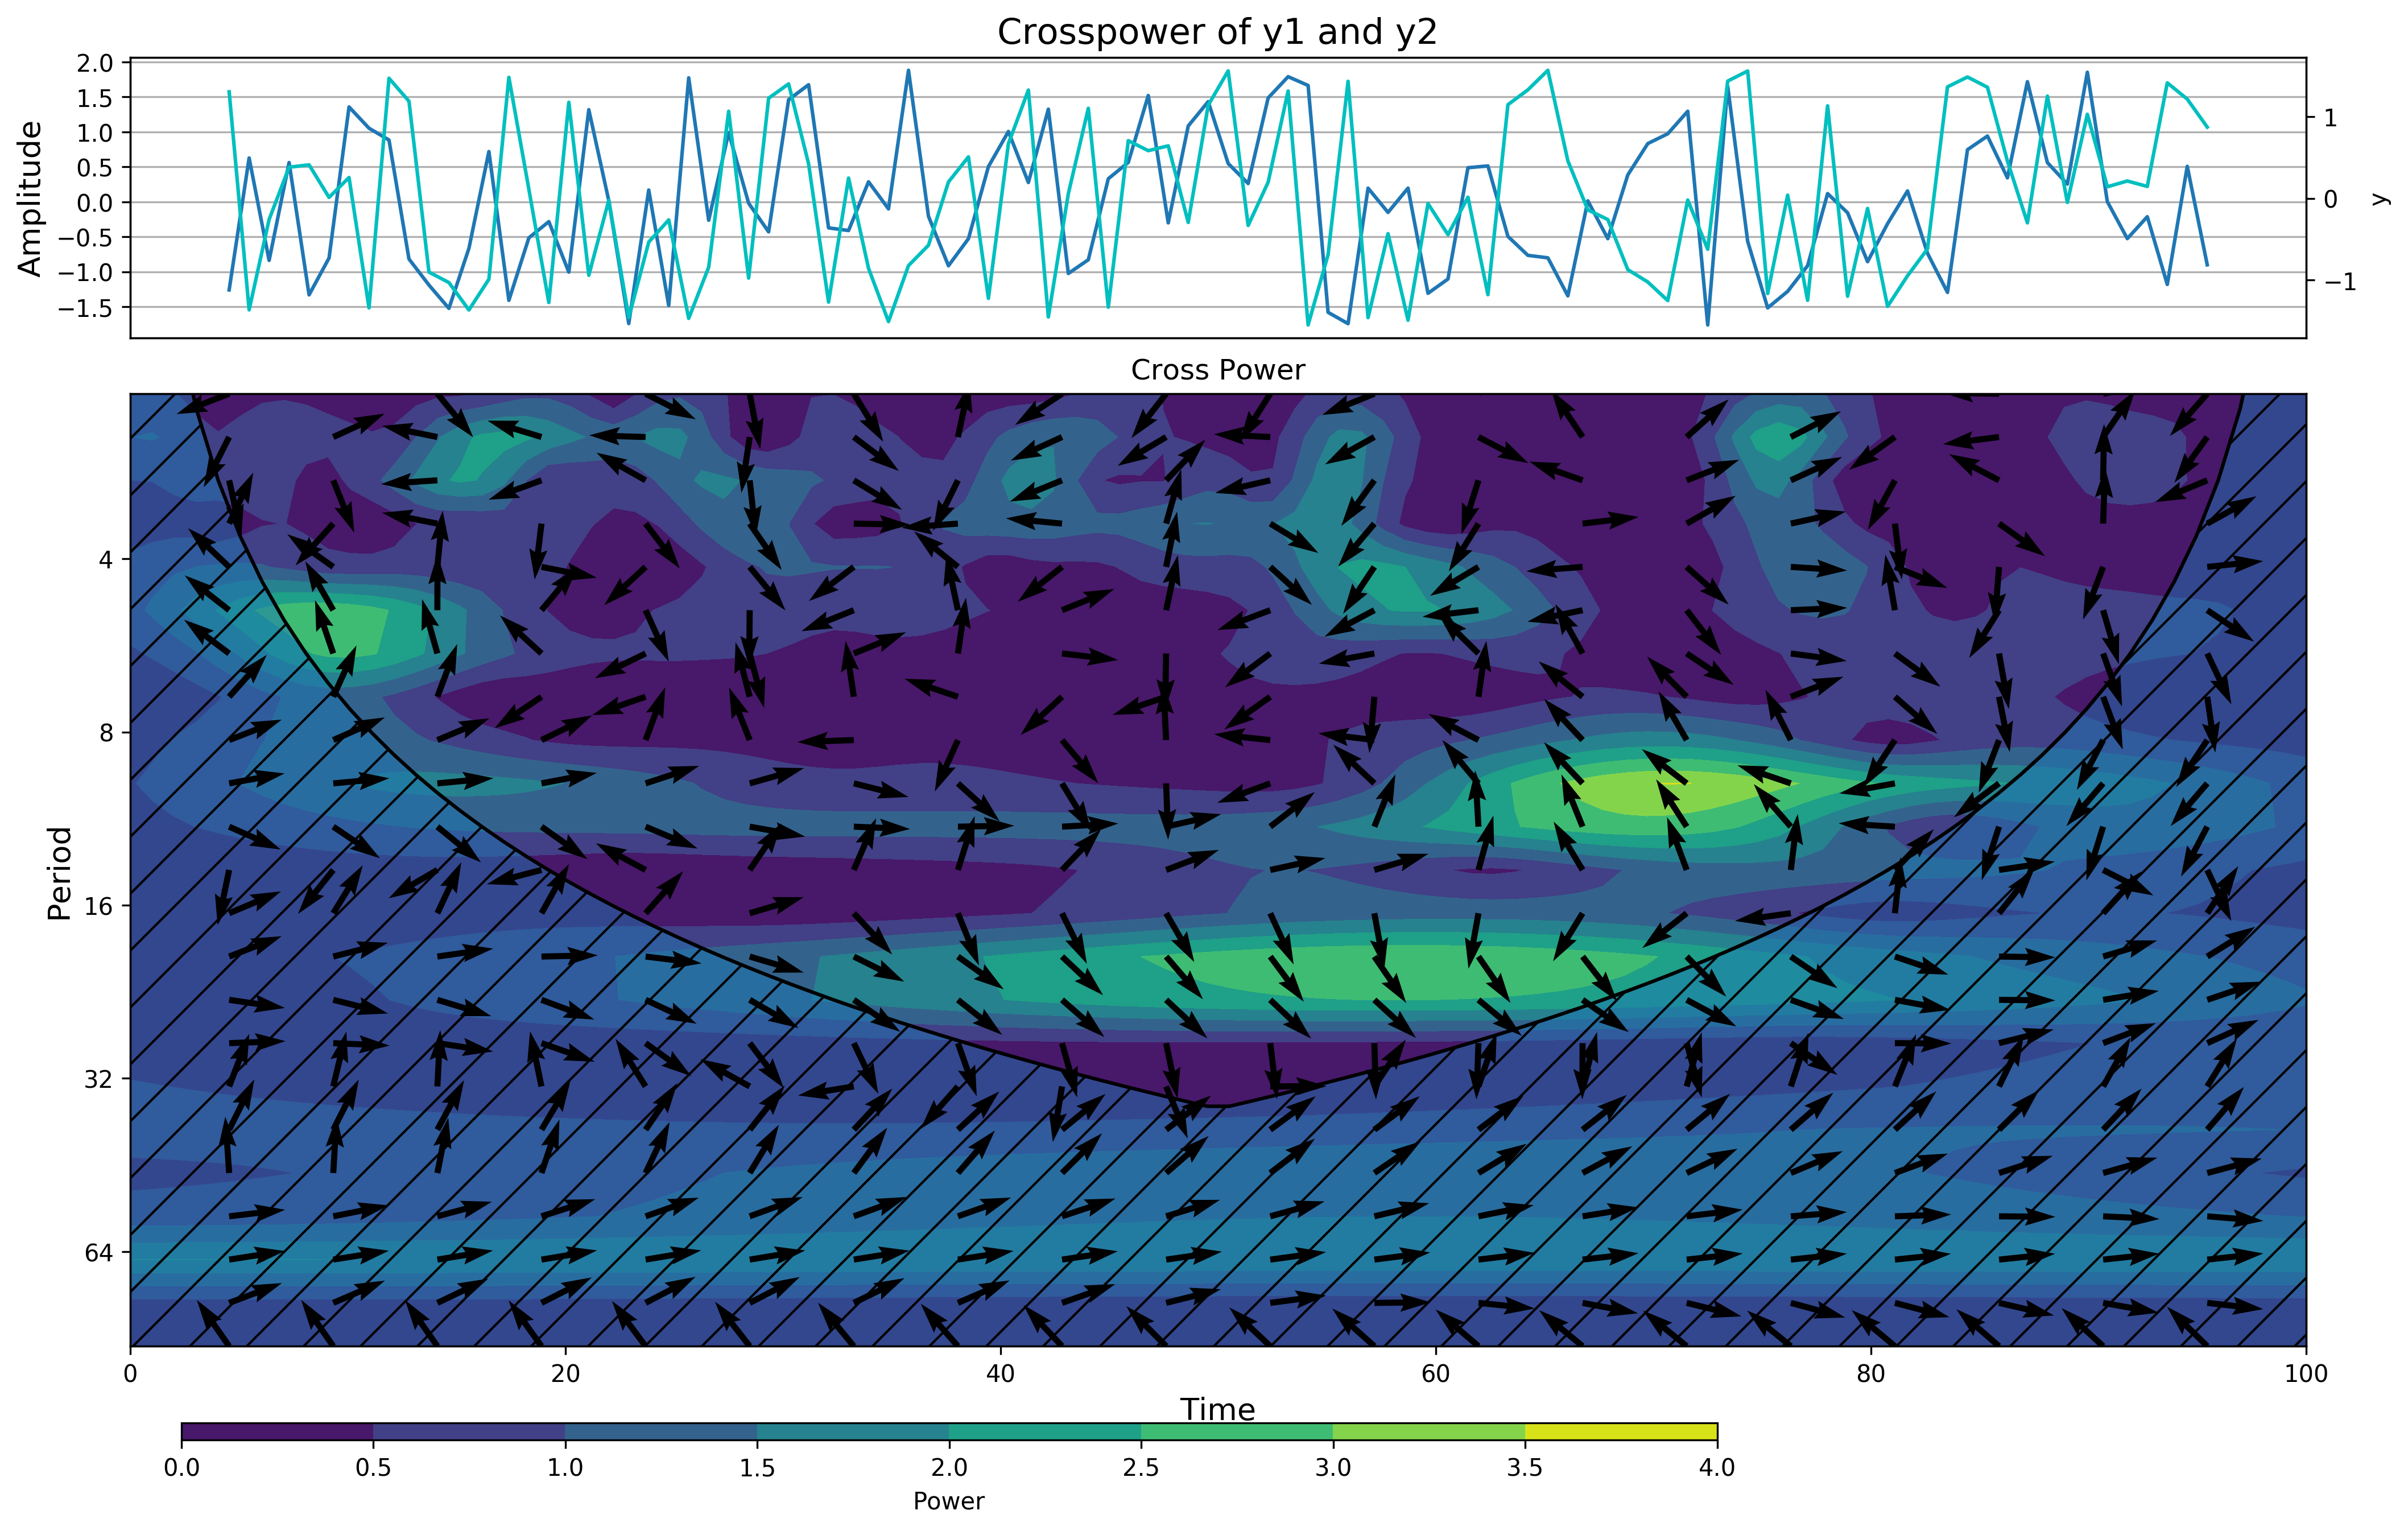

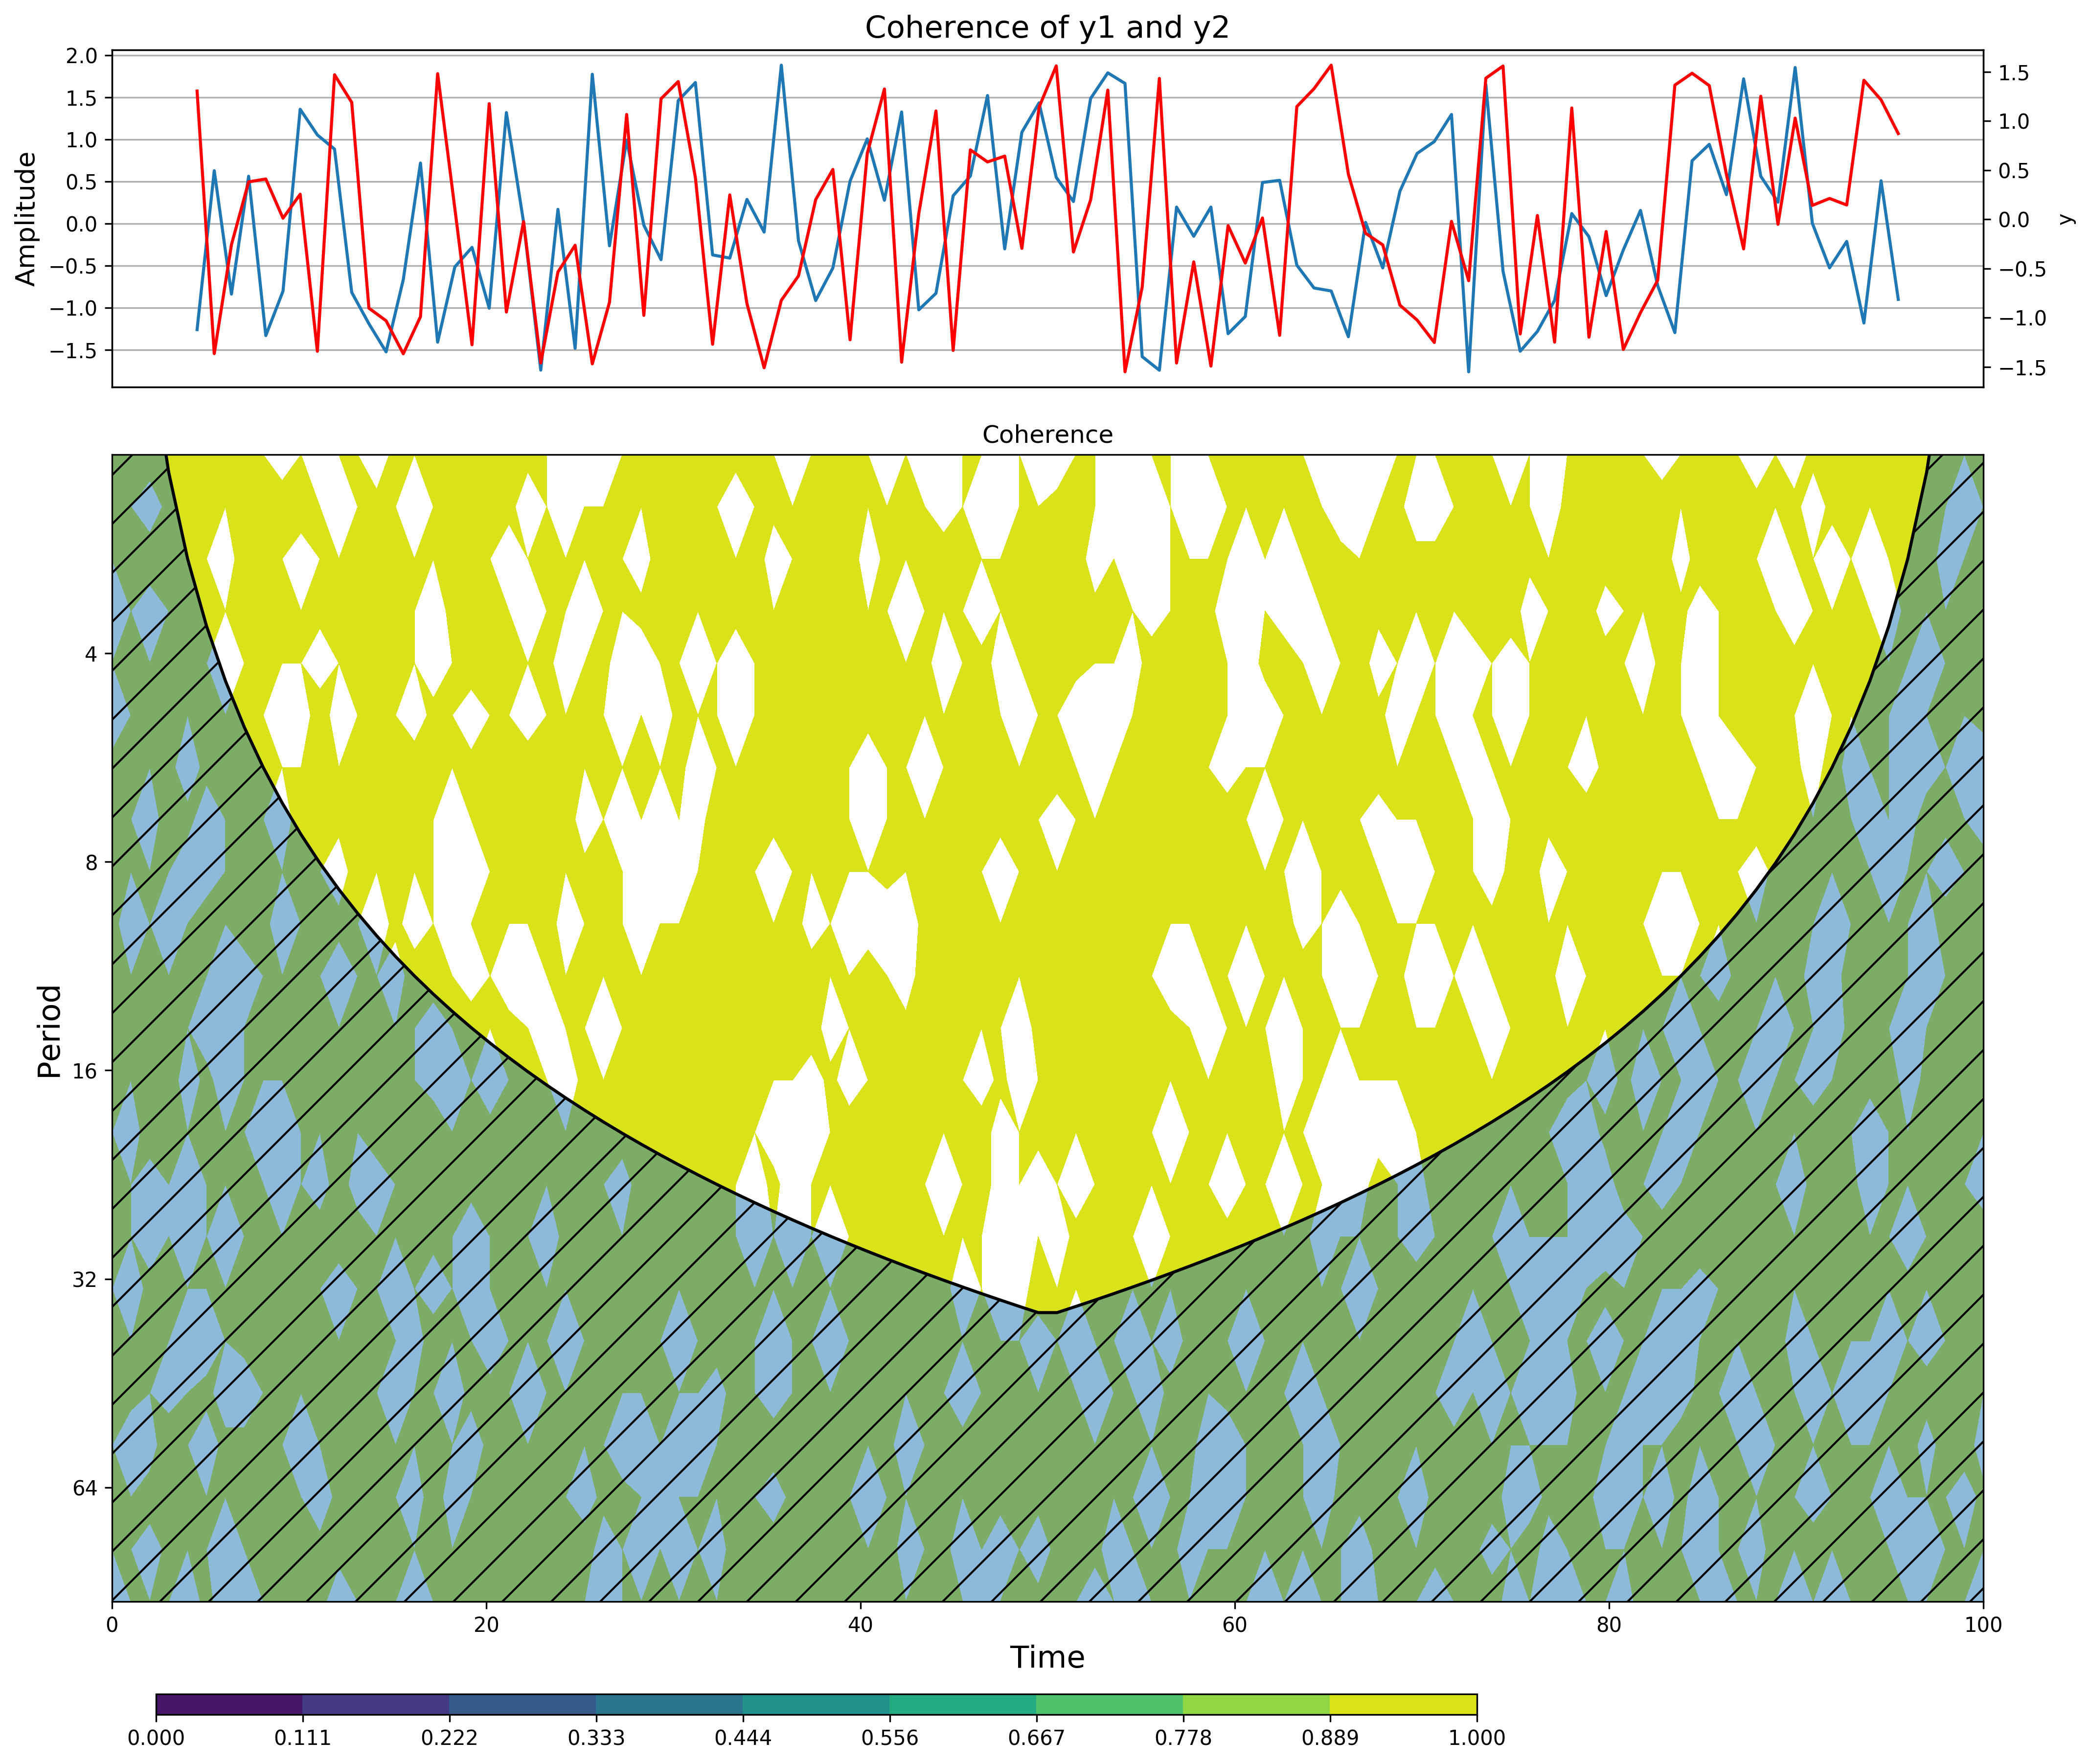

In [246]:
import waipy
import numpy as np

x = np.linspace(0, 100, 100)
y1 = np.random.rand(100)  # Generation of the Random Signal 1
y2 = np.random.rand(100)  # Generation of the Random Signal 2

data_norm = waipy.normalize(y1)
data_norm1 = waipy.normalize(y2)

result = waipy.cwt(data_norm, 1, 1, 0.25, 2, 4/0.25, 0.72, 6, 
                   mother='Morlet', name='x')
result1 = waipy.cwt(data_norm1, 1, 1, 0.25, 2, 4/0.25, 0.72, 6, 
                    mother='Morlet', name='y')

waipy.wavelet_plot('y1-random-signal', x, data_norm, 0.03125, result)
waipy.wavelet_plot('y2-random-signal', x, data_norm1, 0.03125, result1)

cross_power, coherence, phase_angle = waipy.cross_wavelet(result['wave'], 
                                                          result1['wave'])
waipy.plot_cross('Crosspower of y1 and y2', cross_power, phase_angle, x, 
                 result, result1)

waipy.plot_cohere('Coherence of y1 and y2',coherence,x, result, result1)
